In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

import os

from time import strftime
from PIL import Image 

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix
from IPython.display import display
from keras.preprocessing.image import array_to_img

from idx_tools import Idx
import cv2
import random

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename,"r") 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


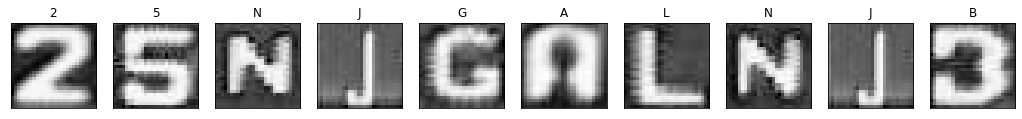

In [3]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 10

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[train_labels[image_num]][0])

In [4]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# How many categories do we have in the dataset
n_categories = len(class_names)


In [13]:
# What are the dimensions of each image
x_size = train_images.shape[1]
y_size = train_images.shape[2]

In [16]:
#train_images_expand = np.expand_dims(train_images, -1)
#test_images_expand = np.expand_dims(test_images, -1)

In [17]:
#train_images_expand.shape

(55731, 28, 28, 1)

In [18]:
#test_images_expand.shape

(23888, 28, 28, 1)

In [20]:
train_images.shape[1]

28

In [21]:
train_images.shape[2]

28

In [7]:
# Pre-processing data for the NN model and constructiong validation set
#nr_rows = train_images.shape[1]
#nr_cols = train_images.shape[2]

#input_shape = (nr_rows, nr_cols, 1)

#train_images = train_images.reshape(train_images.shape[0], nr_rows, nr_cols, 1)
#test_images = test_images.reshape(test_images.shape[0], nr_rows, nr_cols, 1)





In [8]:
#validation_size = 10000

#x_val = train_images[:validation_size]
#y_val = train_labels[:validation_size]

#train_images = train_images[validation_size:]
#train_labels = train_labels[validation_size:]

In [5]:
random.shuffle(train_images)

In [6]:
random.shuffle(test_images)

In [5]:
batch_size = 128
epochs = 50

img_rows = train_images.shape[1]
img_cols = train_images.shape[2]

n_categories = len(class_names)

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

#Creating validation set

#validation_size = 10000

#x_val = train_images[:validation_size]
#y_val = train_labels[:validation_size]

#train_images = train_images[validation_size:]
#train_labels = train_labels[validation_size:]

input_shape = (img_rows, img_cols, 1)

model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_3.add(Conv2D(64, (5, 5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(80))
model_3.add(Dense(n_categories, activation='softmax'))

model_3.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])

history_3 =  model_3.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))

score = model_3.evaluate(test_images, test_labels, verbose=0)
print(score)



Train on 55731 samples, validate on 23888 samples
Epoch 1/50
55731/55731 [==============================] - 91s 2ms/step - loss: 2.5812 - accuracy: 0.3504 - val_loss: 1.2924 - val_accuracy: 0.8507
Epoch 2/50
55731/55731 [==============================] - 88s 2ms/step - loss: 0.9325 - accuracy: 0.7634 - val_loss: 0.3380 - val_accuracy: 0.9658
Epoch 3/50
55731/55731 [==============================] - 89s 2ms/step - loss: 0.4251 - accuracy: 0.8911 - val_loss: 0.1558 - val_accuracy: 0.9805
Epoch 4/50
55731/55731 [==============================] - 91s 2ms/step - loss: 0.2504 - accuracy: 0.9411 - val_loss: 0.0914 - val_accuracy: 0.9856
Epoch 5/50
55731/55731 [==============================] - 88s 2ms/step - loss: 0.1691 - accuracy: 0.9622 - val_loss: 0.0621 - val_accuracy: 0.9891
Epoch 6/50
55731/55731 [==============================] - 88s 2ms/step - loss: 0.1231 - accuracy: 0.9727 - val_loss: 0.0463 - val_accuracy: 0.9915
Epoch 7/50
55731/55731 [==============================] - 89s 2ms/

In [ ]:
#batch_size = 20
    #epochs = 100

#
#score = model_3.evaluate(test_images, test_labels, verbose=0)
#print(score)



Train on 55731 samples, validate on 23888 samples
Epoch 1/100
55731/55731 [==============================] - 110s 2ms/step - loss: 3.1336 - accuracy: 0.0495 - val_loss: 3.1245 - val_accuracy: 0.0784
Epoch 2/100
55731/55731 [==============================] - 115s 2ms/step - loss: 3.1209 - accuracy: 0.0770 - val_loss: 3.1125 - val_accuracy: 0.0756
Epoch 3/100
55731/55731 [==============================] - 114s 2ms/step - loss: 3.1097 - accuracy: 0.0779 - val_loss: 3.1006 - val_accuracy: 0.0749
Epoch 4/100
55731/55731 [==============================] - 109s 2ms/step - loss: 3.0976 - accuracy: 0.0820 - val_loss: 3.0875 - val_accuracy: 0.0806
Epoch 5/100
55731/55731 [==============================] - 108s 2ms/step - loss: 3.0846 - accuracy: 0.0850 - val_loss: 3.0729 - val_accuracy: 0.0923
Epoch 6/100
55731/55731 [==============================] - 109s 2ms/step - loss: 3.0692 - accuracy: 0.0917 - val_loss: 3.0568 - val_accuracy: 0.0954
Epoch 7/100
55731/55731 [=============================

In [8]:
#batch_size = 20
#epochs = 10

#img_rows = train_images.shape[1]
#img_cols = train_images.shape[2]

#n_categories = len(class_names)

#train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
#test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

#input_shape = (img_rows, img_cols, 1)

#model_3 = Sequential()
#model_3.add(Conv2D(32, kernel_size=(5, 5),
                 #activation='relu',
                 #input_shape=input_shape))
#model_3.add(Conv2D(64, (5, 5), activation='relu'))
#model_3.add(MaxPooling2D(pool_size=(2, 2)))
#model_3.add(Dropout(0.3))
#model_3.add(Flatten())
#model_3.add(Dense(128, activation='relu'))
#model_3.add(Dropout(0.3))
#model_3.add(Dense(80))
#model_3.add(Dense(n_categories, activation='softmax'))

#model_3.compile(loss=keras.losses.sparse_categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
              #metrics=['accuracy'])

#history_3 =  model_3.fit(train_images, train_labels,
          #batch_size=batch_size,
          #epochs=epochs,
          #verbose=1,
          #validation_data=(test_images, test_labels))

#score = model_3.evaluate(test_images, test_labels, verbose=0)
#print(score)

Train on 55731 samples, validate on 23888 samples
Epoch 1/10
55731/55731 [==============================] - 118s 2ms/step - loss: 3.1075 - accuracy: 0.0837 - val_loss: 3.0548 - val_accuracy: 0.2341
Epoch 2/10
55731/55731 [==============================] - 113s 2ms/step - loss: 3.0076 - accuracy: 0.1978 - val_loss: 2.9027 - val_accuracy: 0.4577
Epoch 3/10
55731/55731 [==============================] - 113s 2ms/step - loss: 2.8083 - accuracy: 0.3177 - val_loss: 2.5979 - val_accuracy: 0.6013
Epoch 4/10
55731/55731 [==============================] - 114s 2ms/step - loss: 2.4680 - accuracy: 0.4099 - val_loss: 2.1103 - val_accuracy: 0.6674
Epoch 5/10
55731/55731 [==============================] - 114s 2ms/step - loss: 2.0337 - accuracy: 0.4939 - val_loss: 1.5756 - val_accuracy: 0.7545
Epoch 6/10
55731/55731 [==============================] - 115s 2ms/step - loss: 1.6381 - accuracy: 0.5730 - val_loss: 1.1378 - val_accuracy: 0.8274
Epoch 7/10
55731/55731 [==============================] - 115s

In [9]:
#batch_size = 20
# epochs = 10

# img_rows = train_images.shape[1]
# img_cols = train_images.shape[2]

# n_categories = len(class_names)

# train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
# test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

# input_shape = (img_rows, img_cols, 1)

# model_3 = Sequential()
# model_3.add(Conv2D(32, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=input_shape))
# model_3.add(Conv2D(64, (5, 5), activation='relu'))
# model_3.add(MaxPooling2D(pool_size=(2, 2)))
# model_3.add(Dropout(0.4))
# model_3.add(Flatten())
# model_3.add(Dense(128, activation='relu'))
# #model_3.add(Dropout(0.3))
# #model_3.add(Dense(80))
# model_3.add(Dense(n_categories, activation='softmax'))

# model_3.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
#               metrics=['accuracy'])

# history_3 =  model_3.fit(train_images, train_labels,
#           #batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(test_images, test_labels))

# score = model_3.evaluate(test_images, test_labels, verbose=0)
# print(score)

Train on 55731 samples, validate on 23888 samples
Epoch 1/10
55731/55731 [==============================] - 109s 2ms/step - loss: 3.1159 - accuracy: 0.1082 - val_loss: 3.0872 - val_accuracy: 0.1585
Epoch 2/10
55731/55731 [==============================] - 113s 2ms/step - loss: 3.0579 - accuracy: 0.1829 - val_loss: 2.9999 - val_accuracy: 0.2638
Epoch 3/10
55731/55731 [==============================] - 117s 2ms/step - loss: 2.9359 - accuracy: 0.2769 - val_loss: 2.8121 - val_accuracy: 0.4954 loss: 2.9 - ETA: 3s - loss:
Epoch 4/10
55731/55731 [==============================] - 118s 2ms/step - loss: 2.6762 - accuracy: 0.4071 - val_loss: 2.4256 - val_accuracy: 0.5970
Epoch 5/10
55731/55731 [==============================] - 118s 2ms/step - loss: 2.2049 - accuracy: 0.5414 - val_loss: 1.8051 - val_accuracy: 0.7515
Epoch 6/10
55731/55731 [==============================] - 119s 2ms/step - loss: 1.6185 - accuracy: 0.6611 - val_loss: 1.1856 - val_accuracy: 0.8704
Epoch 7/10
55731/55731 [==========

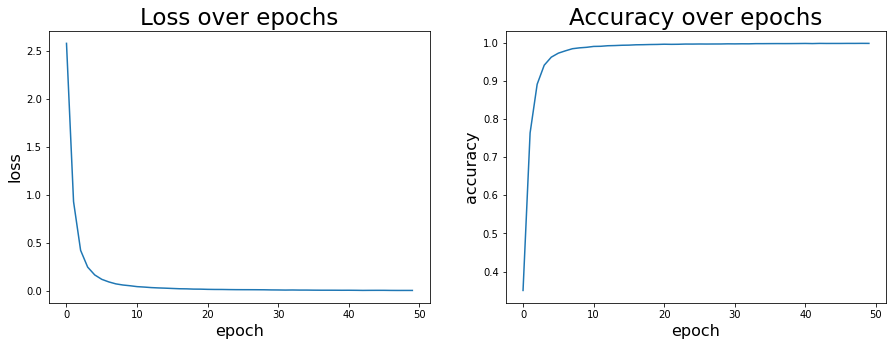

In [6]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
ax[0].plot(history_3.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history_3.history['accuracy'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np




   
def plot_image(i, predictions_array, true_label, img, category_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(category_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         category_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label, n_categories):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(n_categories), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


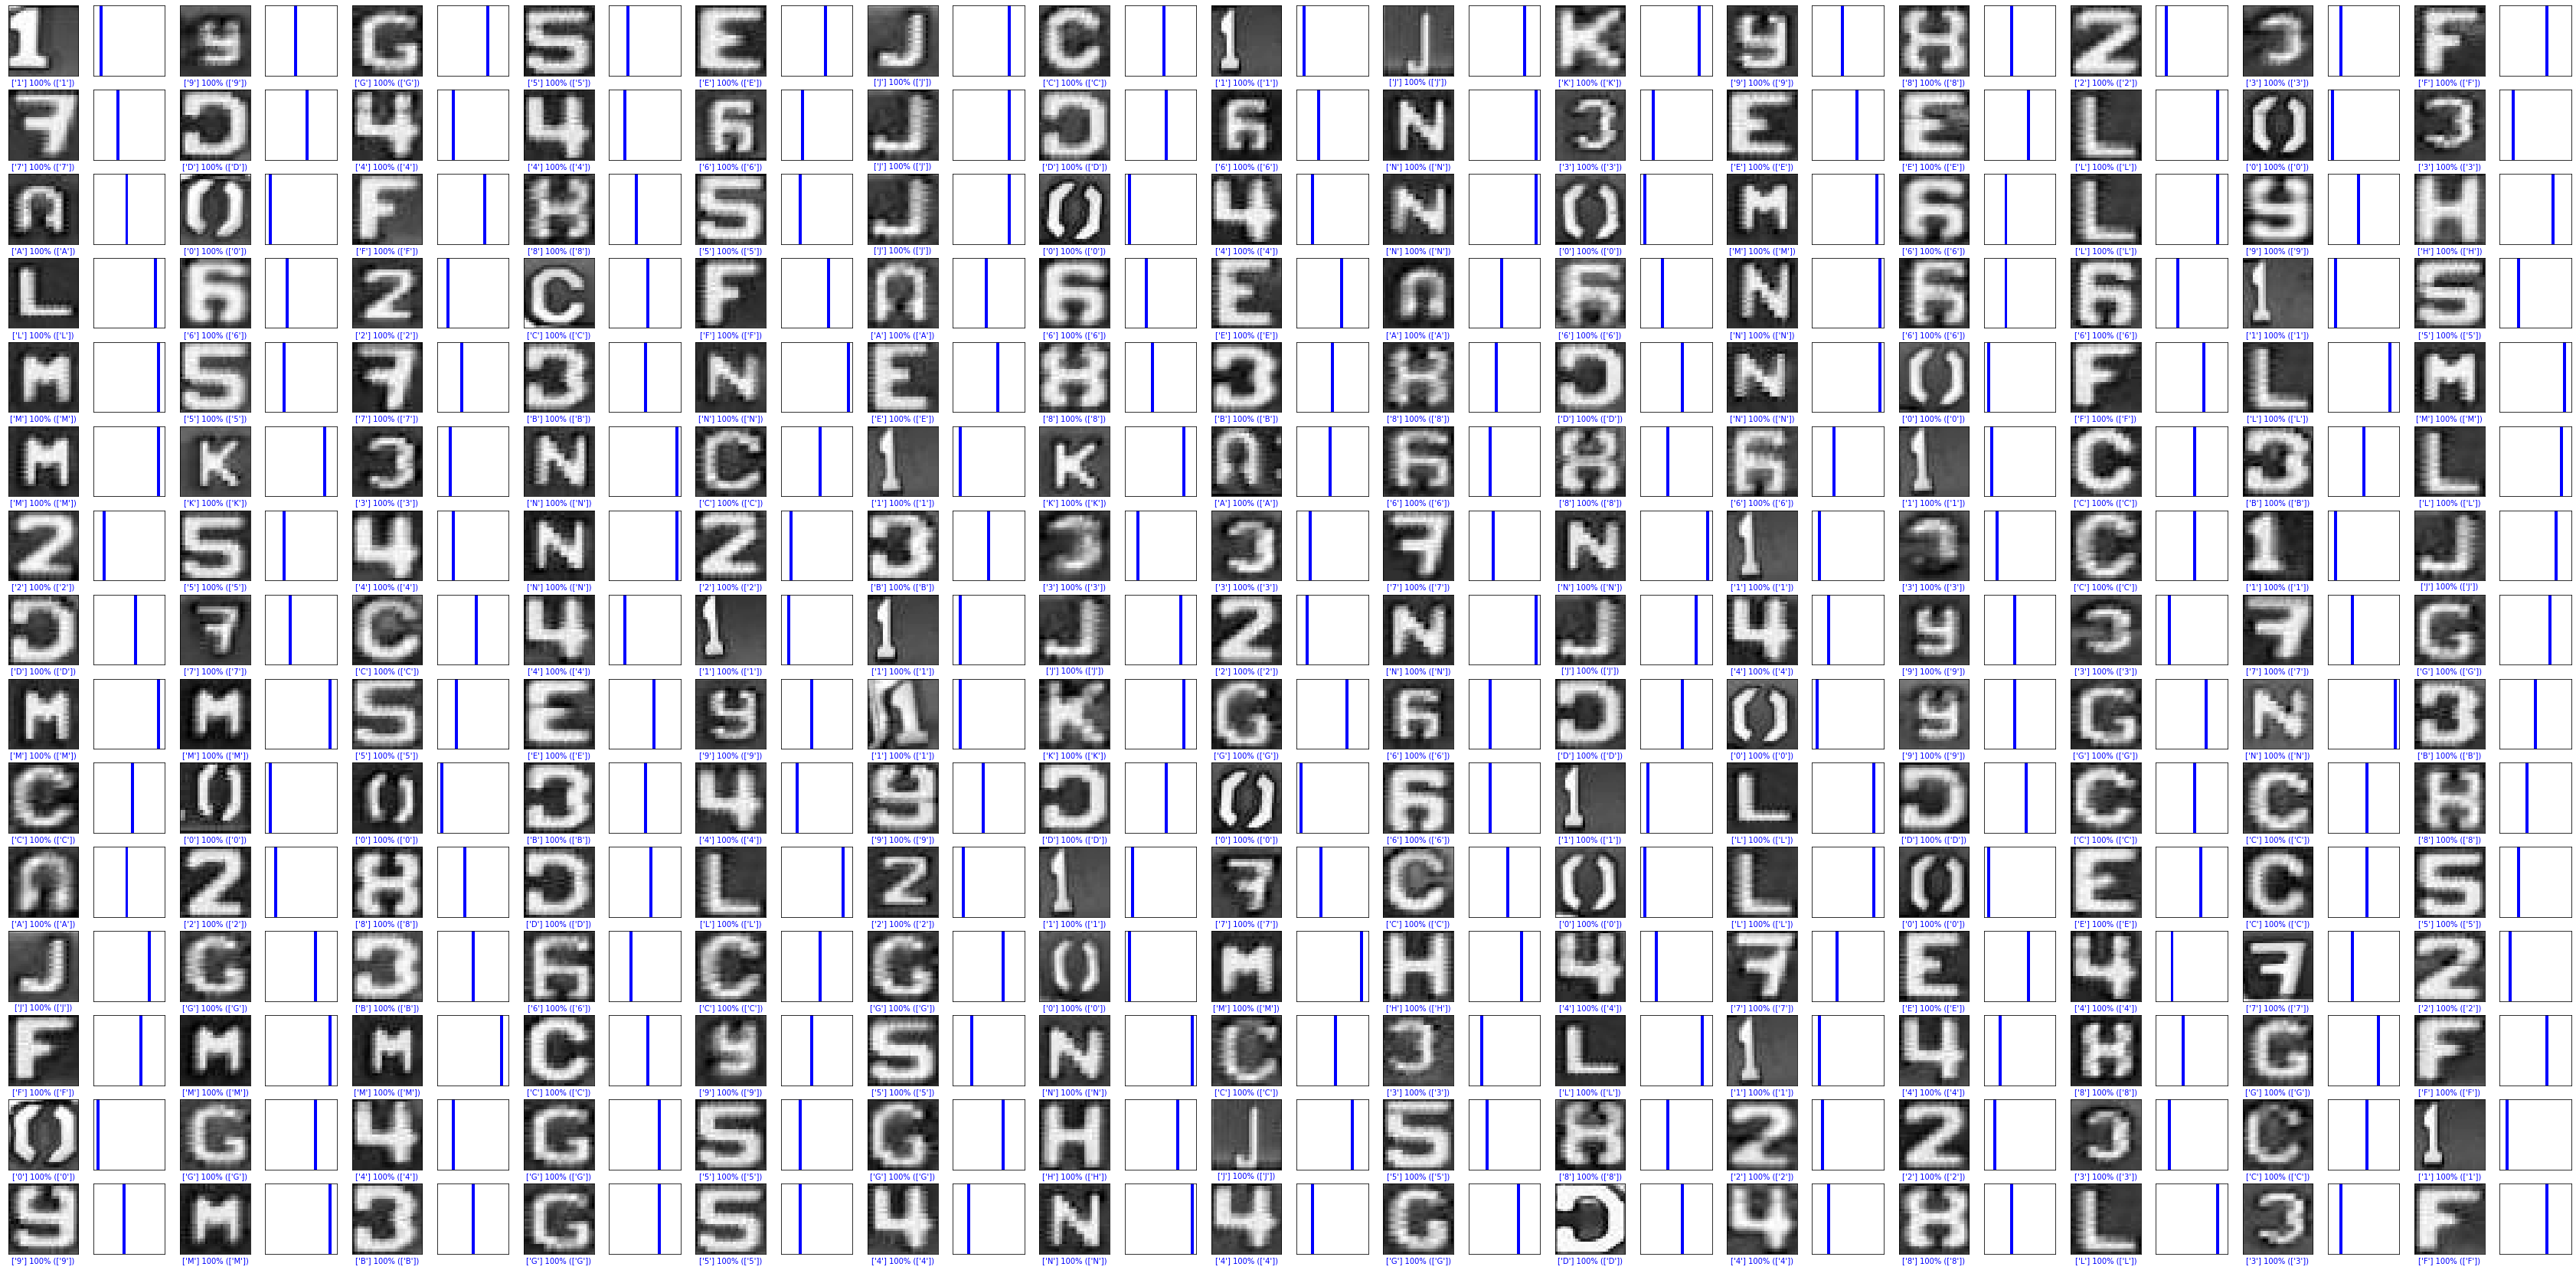

In [10]:
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

predictions = model_3.predict(test_images)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)


# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 15
num_cols = 15
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [16]:
img = cv2.imread('test_1.jpg', cv2.IMREAD_GRAYSCALE)
#test_0 = test_0/255.0
#test_0 = cv2.resize(test_0, (28,28))
img = np.array(img)
img = 255 - img
img = img / 255

In [17]:
result_1 = model_3.predict_classes(img.reshape(-1, 28, 28, 1), verbose=1)

1/1 [==============================] - 0s 2ms/step


In [18]:
print(class_names[result_1[0]])

['1']


In [21]:
if not os.path.isdir('./model_3'):
    os.mkdir('./model_3')

# Save the model structure to JSON file
model_3_json = model_3.to_json()
with open("./model_3/model_3.json", "w") as json_file:
    json_file.write(model_3_json)

# Save weights to HDF5 file
model_3.save_weights("./model_3/model_3.h5")
print("Model_3 saved")

Model_3 saved
